In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
import zipfile
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

dataset_path = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'validation')


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
import zipfile
import os
import tensorflow as tf

# Download the dataset
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_path = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

# Extract path
dataset_path = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')
train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'validation')

# Show folder structure
print("Train dir:", train_dir)
print("Validation dir:", val_dir)


Train dir: /root/.keras/datasets/cats_and_dogs_filtered/train
Validation dir: /root/.keras/datasets/cats_and_dogs_filtered/validation


In [6]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -q cats_and_dogs_filtered.zip


--2025-07-01 21:26:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 192.178.212.207, 209.85.200.207, 74.125.126.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|192.178.212.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   240MB/s    in 0.3s    

2025-07-01 21:26:08 (240 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [7]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')


In [8]:
print("Cats training images:", len(os.listdir(os.path.join(train_dir, 'cats'))))
print("Dogs training images:", len(os.listdir(os.path.join(train_dir, 'dogs'))))


Cats training images: 1000
Dogs training images: 1000


In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 100 batches per epoch
    epochs=10,
    validation_data=val_generator,
    validation_steps=50   # 50 batches for validation
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 63/100 ━━━━━━━━━━━━━━━━━━━━ 1:24 2s/step - accuracy: 0.5011 - loss: 0.9933

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.4987 - loss: 0.9130 - val_accuracy: 0.5270 - val_loss: 0.6927
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.5179 - loss: 0.6925 - val_accuracy: 0.5150 - val_loss: 0.6922
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.5373 - loss: 0.6878 - val_accuracy: 0.6210 - val_loss: 0.6691
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.5901 - loss: 0.6660 - val_accuracy: 0.6250 - val_loss: 0.6360
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.5990 - loss: 0.6535 - val_accuracy: 0.6660 - val_loss: 0.6085
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.6471 - loss: 0.6324 - val_accuracy: 0.6570 - val_loss: 0.6161
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.6473 - loss: 0.6291 - val_accuracy: 0.6470 - val_loss: 0.6183
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.6636 - loss: 0.6145 - val_accuracy: 0.655

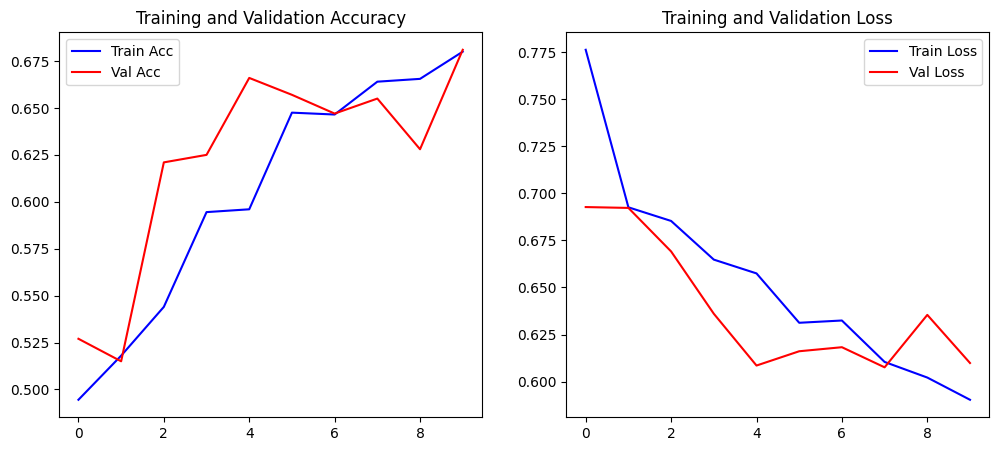

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Train Acc')
plt.plot(epochs, val_acc, 'r', label='Val Acc')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Train Loss')
plt.plot(epochs, val_loss, 'r', label='Val Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [13]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    if prediction > 0.5:
        print(f"Prediction: Dog 🐶 ({prediction:.2f})")
    else:
        print(f"Prediction: Cat 🐱 ({1 - prediction:.2f})")

# Example
# predict_image('your_image.jpg')


In [14]:
model.save("cat_dog_cnn_model.h5")
